In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (14)\netflix_titles.csv")

# Basic inspection
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


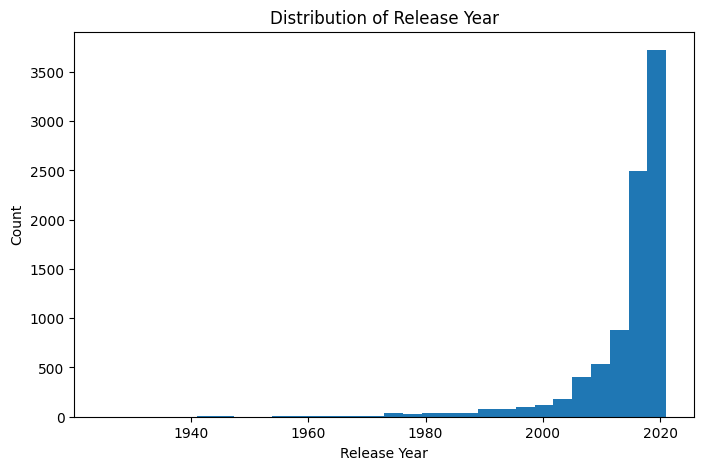

In [5]:
#Release Year
plt.figure(figsize=(8,5))
plt.hist(df['release_year'], bins=30)
plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


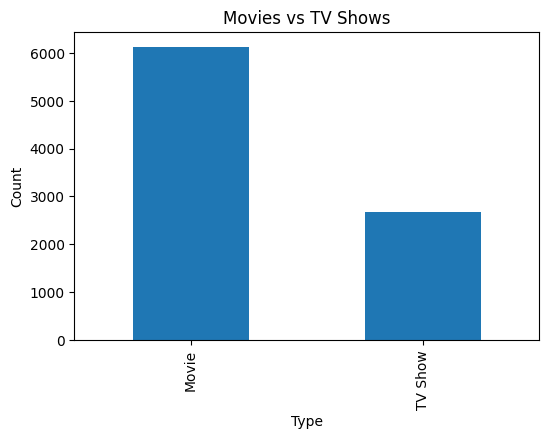

In [15]:
#Movies vs TV Shows
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar')
plt.title("Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


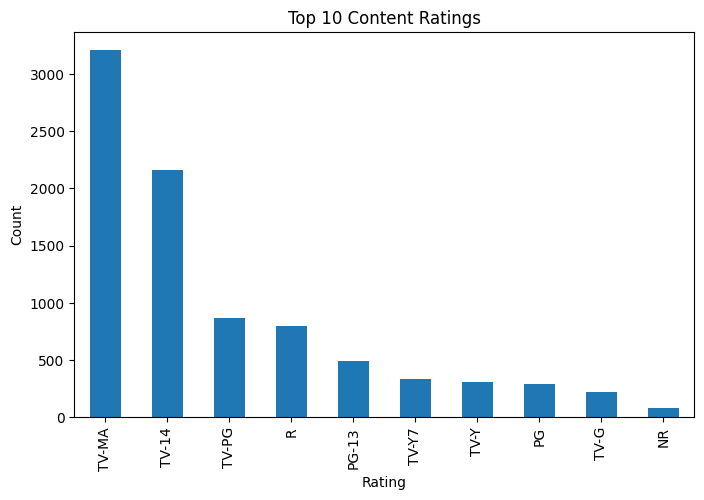

In [6]:
#Content Rating Distribution
plt.figure(figsize=(8,5))
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [7]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)


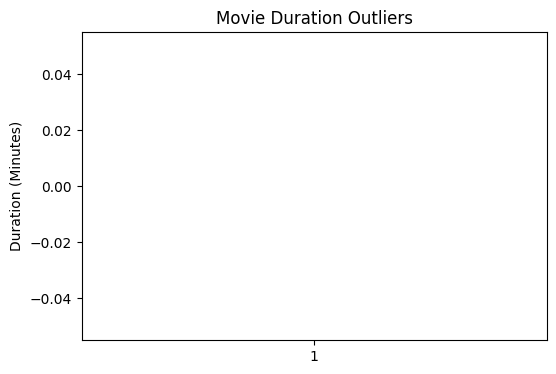

In [14]:
#Box Plot
plt.figure(figsize=(6,4))
plt.boxplot(movies['duration_minutes'])
plt.title("Movie Duration Outliers")
plt.ylabel("Duration (Minutes)")
plt.show()


In [9]:
#Select Numerical Features
numeric_df = movies[['release_year', 'duration_minutes']]


In [10]:
#Correlation Matrix
corr = numeric_df.corr()


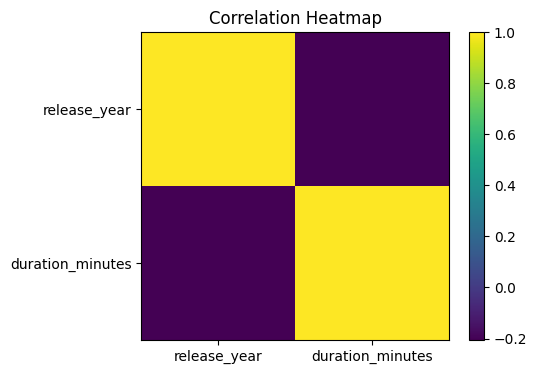

In [11]:
#Heatmap
plt.figure(figsize=(5,4))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()
